In [2]:
## Libraries
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import pv_model_class

In [3]:
# Constants and variables

Iscn = 8.21 #8.7 # nominal short circuit current
Vocn = 32.9 #37.7 # nominal open circuit voltage
Imp = 7.61 #8.2 # array current at MPP
Vmp = 26.3 #30.1 # array voltage at MPP
Pmax_e = Vmp * Imp # experimental array max power output
Kv = -0.123 #-0.32/100 * Vocn # voltage temperature coefficient
Ki = 0.0032 #-0.032/100 * Iscn # current temperature coefficient
Ns = 54 #60. # number of series cells
Gn = 1000. # nominal irradiance
G = Gn
Tn = 25. + 273.15 # nominal operating temperature
T = Tn

Egap = 1.8 * 10 ** -19 # Bandgap of silicon (silicio cristalino)

err = 0.0001


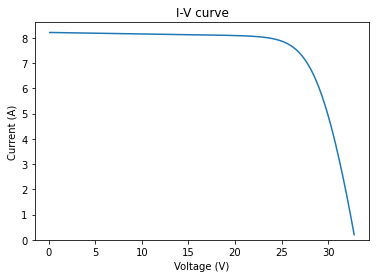

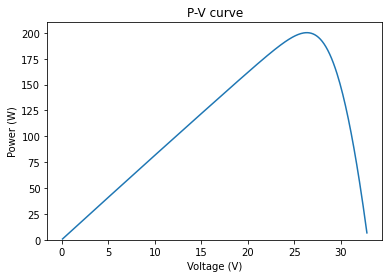

Maximum Power: 200.13356933546547
Maximum v, i: 26.300000000000004 , 7.609641419599446


In [4]:
# Nominal PV model

# initialize model object
pv_mod = pv_model_class.PvModel(Iscn, Vocn, Imp, Vmp, Kv, Ki, Ns, Gn, G, Tn, T, Egap, err)
# find resistor values and diode ideality constant
Rs, Rp, a = pv_mod.find_resistors()
# find voltage, current, and power arrays
v, i, P = pv_mod.calculate_power(Rs, Rp, a)

# plot IV and PV curves
pv_mod._plot(v, i, 'Voltage (V)', 'Current (A)', 'I-V curve')
pv_mod._plot(v, P, 'Voltage (V)', 'Power (W)', 'P-V curve')

# find maximum power point
P_max = np.argmax(P)
print('Maximum Power:', P[P_max])
print('Maximum v, i:', v[P_max],",",i[P_max])

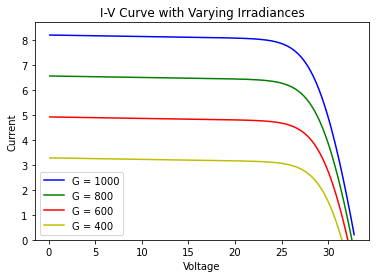

In [5]:
## Sensitivity analysis: Varying Irradiances

pv_mod_g1 = pv_model_class.PvModel(Iscn, Vocn, Imp, Vmp, Kv, Ki, Ns, Gn, 800, Tn, Tn, Egap, err)
pv_mod_g2 = pv_model_class.PvModel(Iscn, Vocn, Imp, Vmp, Kv, Ki, Ns, Gn, 600, Tn, Tn, Egap, err)
pv_mod_g3 = pv_model_class.PvModel(Iscn, Vocn, Imp, Vmp, Kv, Ki, Ns, Gn, 400, Tn, Tn, Egap, err)
v_g1, i_g1, P_g1 = pv_mod_g1.calculate_power(Rs, Rp, a)
v_g2, i_g2, P_g2 = pv_mod_g2.calculate_power(Rs, Rp, a)
v_g3, i_g3, P_g3 = pv_mod_g3.calculate_power(Rs, Rp, a)

plt.plot(v, i, 'b', label='G = 1000')
plt.plot(v_g1, i_g1, 'g', label='G = 800')
plt.plot(v_g2, i_g2, 'r', label='G = 600')
plt.plot(v_g3, i_g3, 'y', label='G = 400')
plt.xlabel('Voltage')
plt.ylabel('Current')
plt.title('I-V Curve with Varying Irradiances')
plt.legend()
plt.axis((None, None, 0, None))
plt.show()

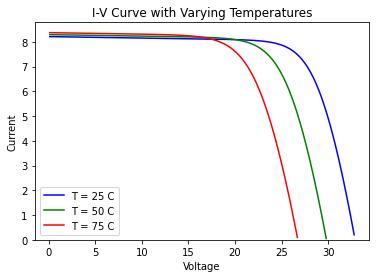

Maximum Power: 186.65332876035
Maximum v, i: 23.300000000000004 , 7.565576245722429
Maximum Power: 163.33049588532555
Maximum v, i: 20.200000000000003 , 7.545175903283711


In [6]:
## Sensitivity analysis: Varying Temperatures

pv_mod_t1 = pv_model_class.PvModel(Iscn, Vocn, Imp, Vmp, Kv, Ki, Ns, Gn, Gn, Tn, 50 + 273.15, Egap, err)
pv_mod_t2 = pv_model_class.PvModel(Iscn, Vocn, Imp, Vmp, Kv, Ki, Ns, Gn, Gn, Tn, 75 + 273.15, Egap, err)
v_t1, i_t1, P_t1 = pv_mod_t1.calculate_power(Rs, Rp, a)
v_t2, i_t2, P_t2 = pv_mod_t2.calculate_power(Rs, Rp, a)

plt.plot(v, i, 'b', label='T = 25 C')
plt.plot(v_t1, i_t1, 'g', label='T = 50 C')
plt.plot(v_t2, i_t2, 'r', label='T = 75 C')
plt.xlabel('Voltage')
plt.ylabel('Current')
plt.title('I-V Curve with Varying Temperatures')
plt.legend()
plt.axis((None, None, 0, None))
plt.show()

P_max = np.argmax(P_t1)
print('Maximum Power:', P[P_max])
print('Maximum v, i:', v_t1[P_max],",",i_t1[P_max])

P_max = np.argmax(P_t2)
print('Maximum Power:', P[P_max])
print('Maximum v, i:', v_t2[P_max],",",i_t2[P_max])

In [15]:
pv_mod = pv_model_class.PvModel(Iscn, Vocn, Imp, Vmp, Kv, Ki, Ns, Gn, G, Tn, T, Egap, err)
Rs, Rp, a = pv_mod.find_resistors()

# Config 0: one module
v, i, P = pv_mod.calculate_power(Rs, Rp, a)

# Config 1: two identical modules in parallel (nominal)
v_array1 = v
i_array1 = i * 2

# Config 2: two identical modules in series (nominal)
v_array2 = v * 2
i_array2 = i 

# Config 3: two strings of identical modules (with two in series) in parallel
v_array3 = v * 2
i_array3 = i * 2

# Config 3: three strings of identical modules (with two in series) in parallel
v_array4 = v * 2
i_array4 = i * 3


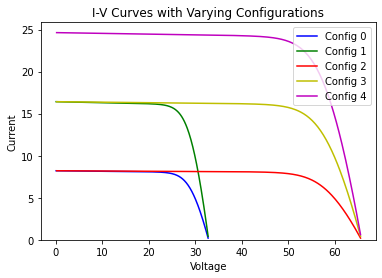

In [16]:
plt.plot(v, i, 'b', label='Config 0')
plt.plot(v_array1, i_array1, 'g', label='Config 1')
plt.plot(v_array2, i_array2, 'r', label='Config 2')
plt.plot(v_array3, i_array3, 'y', label='Config 3')
plt.plot(v_array4, i_array4, 'm', label='Config 4')
plt.xlabel('Voltage')
plt.ylabel('Current')
plt.title('I-V Curves with Varying Configurations')
plt.legend()
plt.axis((None, None, 0, None))
plt.show()
